In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cities_data = "city_data.csv"
rides_data = "ride_data.csv"

# Read the City and Ride Data
cities_data = pd.read_csv("city_data.csv")
rides_data = pd.read_csv("ride_data.csv")



In [2]:
# Drop any duplicate values
cities_data = cities_data.drop_duplicates('city')
# Check city data
cities_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Combine the data into a single dataset
pyber_data = pd.merge(rides_data,cities_data, on='city')
pyber_data.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

Text(43, 41, 'Note:\nCircle size correlates with driver count per city.')

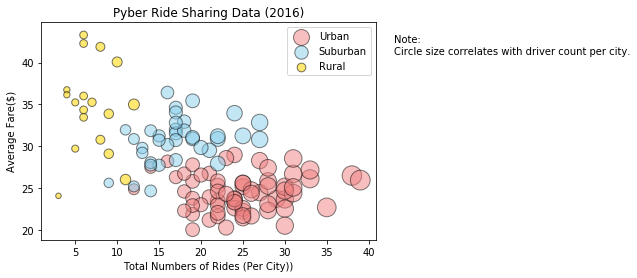

In [12]:
# Obtain the x and y coordinates for each of the three city types

urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

# Build the scatter plots for each city types
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

# Incorporate the other graph properties
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, linewidth = 1, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, linewidth = 1, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, linewidth = 1, label="Rural")

# Create a legend 
plt.legend(loc='upper right')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.text(43, 41,"Note:\nCircle size correlates with driver count per city.")


# Incorporate a text label regarding circle size

# Save Figure
# plt.savefig("Images/% of Total Fares By City Types.png")


## Total Fares by City Type

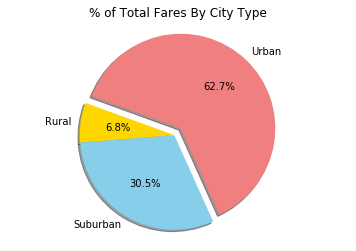

In [13]:
# Calculate Type Percents
total_fare = pyber_data.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
#plt.savefig("Images/% of Total Fares By City Types.png")

# Show Figure
plt.show()

## Total Rides by City Type

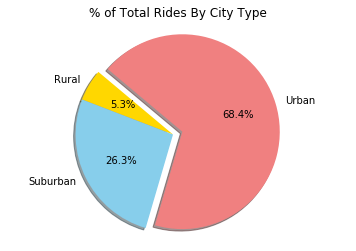

In [14]:
# Calculate Ride Percents
total_rides = pyber_data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Save Figure
#plt.savefig("Images/% of Total Rides By City Types.png")


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
total_drivers = cities_data.groupby(['type'])['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Save Figure
# plt.savefig("Images/% of Total Drivers By City Types.png")

In [ ]:
# Show Figure
plt.show()